<a href="https://colab.research.google.com/github/VanithaHong/P153110-Data-Science-Project-2/blob/main/P153110_Project_2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vanitha a/p  Hong Wee Liang (P153110) Data Science Project 2**

Contents:


*   INTRODUCTION
*   PROBLEM STATEMENT
*   DATA CLEANING
*   RESULTS AND DISCUSSION
*   CONCLUSION









# **INTRODUCTION** <a id="INTRODUCTION"></a>

The dataset is obtained from the pharmaceutical company "Pharmaniaga" The dataset can be downloaded from [data](https://docs.google.com/spreadsheets/d/1LW5YkRKvbztMtTUK5NuNGZ_vclnktxIz/edit?usp=drive_link&ouid=117138986410645649344&rtpof=true&sd=trueURL) for reproducibility.It provides information on transaction sales data form year 2021 to 2024 including informations such as product details and sales value

The purpose of this project is to analyze the dataset containing sales data from the "Novel Department" in "Pharmaniaga" from 2021 till 2024 to provide actionable insights into sales performance, geographic trends and customer behaviour to enable the department or business to make data-driven decisions to optimize sales strategy and maximize revenue. The analysis would also be beneficial to study the sales trend as new products also been introduced in the past 5 years.

In [ ]:
!pip install pandas openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
import io
from google.colab import files

# Prompt the user to upload the file
uploaded = files.upload()

# Get the filename and file contents
filename = list(uploaded.keys())[0]
file_content = uploaded[filename]

# Read the Excel file using a buffer
df = pd.read_excel(io.BytesIO(file_content))

# Display the dataframe
print(df.head())


Saving Novel_Department_Master.xlsx to Novel_Department_Master (3).xlsx
   WH   Cust Group    Month  Year QTD     Brand            Item  \
0  E1  (d) Private  January  2021  Q1   AFTAMED  01.1415.29.891   
1  E1  (d) Private  January  2021  Q1   AFTAMED  01.1415.30.891   
2  E1  (d) Private  January  2021  Q1  GENGIGEL  01.1415.02.892   
3  E1  (d) Private  January  2021  Q1  GENGIGEL  01.1415.02.892   
4  E1  (d) Private  January  2021  Q1  GENGIGEL  01.1415.03.892   

                                     Description  Customer Acc No  \
0                AFTAMED GEL CLASSIC.TUBE OF 8ML          16026.0   
1                 AFTAMED JUNIOR GEL.TUBE OF 8ML          16026.0   
2                      GENGIGEL GEL.TUBE OF 20ML          62071.0   
3                      GENGIGEL GEL.TUBE OF 20ML          62071.0   
4  GENGIGEL  HYDROGEL MOUTHRINSE.BOTTLE OF 150ML          62071.0   

                    Customer Name  ...    DOCNO Area sales PS 2024  \
0      51 AVENUE PHARMACY SDN BHD  ...  

<font color='red'>**Comments:**

<font color='red'>**- What is the purpose of running print(df.head())?**

<font color='red'>**- You’re not running it just for the sake of it, right?**

<font color='red'>**- Please provide some explanation for the benefit of the readers.**

In [ ]:
#Description of the dataset
print(df.describe())
print(df.columns)

               Year  Customer Acc No  QTY1 + QTY2)   SUM(MISALES)
count  72829.000000     72772.000000  72788.000000   72829.000000
mean    2022.639937     32565.771547     29.855072     977.456999
std        1.116584     25142.505513     65.405190    2174.815203
min     2021.000000      1004.000000   -550.000000  -13750.000000
25%     2022.000000      6572.000000      5.000000     240.000000
50%     2023.000000     28803.000000     12.000000     498.800000
75%     2024.000000     62460.000000     30.000000    1080.000000
max     2024.000000     97000.000000   5000.000000  170000.000000
Index(['WH', 'Cust Group', 'Month', 'Year', 'QTD', 'Brand', 'Item',
       'Description', 'Customer Acc No', 'Customer Name', 'Sector', 'KA/NKA',
       'PV/NPV', 'DOCNO', 'Area sales', 'PS 2024', 'SalesRep Name',
       'Supplier Name', 'QTY1 + QTY2)', 'SUM(MISALES)', 'Town', 'POSCODE',
       'State'],
      dtype='object')


The dataset consists of columns such as:

1.   WH: Warehouse identifier
2.   Cust Group: Customer group classification
3. Month: Month of the transaction
4. Year: Year of the transaction
5. QTD: Quarter to date indicator
6. Brand: Product brand
7. Item: Item code
8. Description: Item description
9. Customer Acc No: Customer account number
10. Customer Name: Name of the customer
11. Sector: Customer sector classification
12. KA/NKA: Key account (KA) or non-key account(NKA) status
13. PV/NPV: Product value classification
14. DOCNO: Document number
15. Area sales: Sales area identifier
16. PS 2024:Performance segment for 2024
17. SalesRep Name: Name of the sales representative
18. Supplier Name: Name of the product supplier
19. QTY1 + QTY2): Combined quantity of products
20. SUM(MISALES): Total sales amount
21. Town: Customer's town
22. POSCODE: Postal code
23. State: State of the customer

# **PROBLEM STATEMENT** <a id="PROBLEM STATEMENT"></a>

The company is on financial recovery after few setbacks due to multiple factors incluidng he Covid-19 pandemic. In its pursuit of sustainable growth, the company aims to to optimize its sales performance and understand key drives behind revenue growth by analysing historical sales data from year 2021 till 2024. The Novel department is one of the department that shows potential in bringing profit to the company with its lineup of new and experienced team members. As a data scientist, I could contribute by identifying overall sales trends, evaluate product and brand performance, analyse customer behaviour and regional sales distribution. These insights will help shape strategic decision making around marketing, product and regional growth.

# **DATA CLEANING**

The RAW DATA is cleaned accordingly to ensure accuracy and reliability in subsequent
analyses

In [ ]:
#Check and display duplicated rows
df.duplicated().sum()
duplicated_rows = df[df.duplicated()]
print(f"Number of Duplicate Rows: {duplicated_rows}")

Number of Duplicate Rows:        WH   Cust Group    Month  Year QTD     Brand            Item  \
215    E1  (d) Private  January  2021  Q1  GENGIGEL  01.1415.01.892   
216    E1  (d) Private  January  2021  Q1  GENGIGEL  01.1415.02.892   
217    E1  (d) Private  January  2021  Q1  GENGIGEL  01.1415.01.892   
218    E1  (d) Private  January  2021  Q1  GENGIGEL  01.1415.02.892   
318    E1  (d) Private  January  2021  Q1  GENGIGEL  01.1415.20.892   
...    ..          ...      ...   ...  ..       ...             ...   
63399  E1  (d) Private     July  2024  Q3  GENGIGEL  01.1415.02.892   
64023  E1  (d) Private   August  2024  Q3   AFTAMED  01.1415.29.891   
64025  E1  (d) Private   August  2024  Q3   AFTAMED  01.1415.29.891   
64062  E1  (d) Private   August  2024  Q3   AFTAMED  01.1415.19.891   
64475  E1  (d) Private   August  2024  Q3   AFTAMED  01.1415.19.891   

                              Description  Customer Acc No  \
215    GENGIGEL GEL 1G.BOX OF 100 SACHETS          33850.0 

<font color='red'>**Comments:**

<font color='red'>**- Could you provide some explanations for non-technical readers on how to interpret the output from the table above?**

<font color='red'>**- Is there any duplicated data? Please provide an explanation to guide the readers.**

In [ ]:
# Pass a list of columns to drop to the 'columns' argument
df.drop(columns=['WH', 'QTD', 'Item','Customer Acc No', 'Customer Name', 'KA/NKA', 'PV/NPV', 'DOCNO', 'Area sales', 'Town','PS 2024', 'SalesRep Name', 'Supplier Name', 'POSCODE'], inplace=True)

<font color='red'>**Comments:**

<font color='red'>**- What is your justification for dropping these columns?**

<font color='red'>**- Please provide an explanation.**

In [ ]:
#The remaining duplicate rows are retained as required for the analysis
print(df.columns)

Index(['Cust Group', 'Month', 'Year', 'Brand', 'Description', 'Sector',
       'QTY1 + QTY2)', 'SUM(MISALES)', 'State'],
      dtype='object')


In [ ]:
# Verify Data Types
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
Cust Group       object
Month            object
Year              int64
Brand            object
Description      object
Sector           object
QTY1 + QTY2)    float64
SUM(MISALES)    float64
State            object
dtype: object


<font color='red'>**Comments:**

<font color='red'>**- Again, do the data types match your expectations?**

<font color='red'>**- Please provide some explanations.**

In [ ]:
#Standardize Columns to a consistent format
df.rename(columns={'SUM(MISALES)': 'Total_sales'}, inplace=True)

In [ ]:
df.columns = (
    df.columns.str.strip()  #remove trailing spaces
                .str.lower() #change to lowercase
                .str.replace(' ','_') #replace spaces with underscores
)
print(df.columns)

Index(['cust_group', 'month', 'year', 'brand', 'description', 'sector',
       'qty1_+_qty2)', 'total_sales', 'state'],
      dtype='object')


In [ ]:
df.rename(columns={'qty1_+_qty2)': 'quantity'}, inplace=True)
print(df.columns)

Index(['cust_group', 'month', 'year', 'brand', 'description', 'sector',
       'quantity', 'total_sales', 'state'],
      dtype='object')


Handling missing values

Based on my purpose of analysis and the nature of the data, the missing values are replaced with zero instead of using mean or median because of several reason as below:
1. To reflect the reality of no sales where transaction with a missing quantity could mean no items purchased
2. As the dataset involves various products and regions, replacing with mean or median introduces artificial value that distort the analysis. It could skew the sales trends and increase bias. For example, region A may have high sales and region B low sales, by replacing misisng values in region with a value could lead to inappropriate comparisons across product and regions and doesnt preserve its unique characteristics.
3. Preserves aggregated analysis accuracy as it is crucial for the analysis that will be done

<font color='red'>**Comments:**

<font color='red'>**- Brilliant arguments! This is 'the standard' I expect from your analysis. Well done and keep it up!**

In [ ]:
#Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

cust_group      0
month           0
year            0
brand           0
description     0
sector          0
quantity       41
total_sales     0
state           0
dtype: int64


In [ ]:
#there are 41 missing values at column "Quantity"
#the missing values are filled with zero to ensure data integrity while maintaining all other data points for analysis
df['quantity'] = df['quantity'].fillna(0)
print("Missing values in 'quantity' column have been replaced with 0. ")


Missing values in 'quantity' column have been replaced with 0. 


In [ ]:
#remove rows with negative or zero values in 'Quantity" and SUM(MISALES)
df = df[(df['quantity'] > 0) & (df['total_sales'] > 0)]
print(f"Number of rows after removing negative and zero values: {df.shape[0]}")

Number of rows after removing negative and zero values: 70273


Handling Outliers

One of the methods to handle outliers is using the IQR. To decide on whether a data is an outlier, we can observe the equation:

Upper Fence=Q3+1.5(IQR)
Lower Fence=Q1−1.5(IQR)



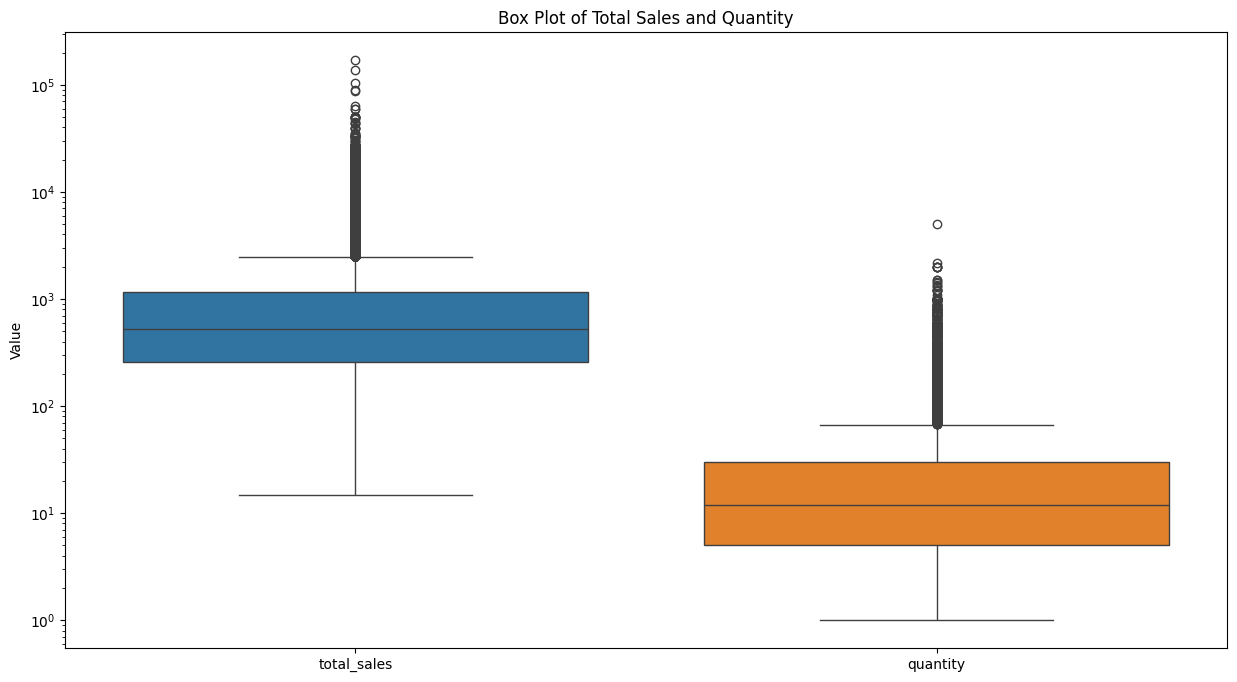

In [ ]:
# Create the box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['total_sales', 'quantity']]) # Fixed: Removed extra indent
plt.title('Box Plot of Total Sales and Quantity')
plt.ylabel('Value')
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.show()


The figure above shows box plot for "total_sales" and "quantity". Any values which are above the upper fence and below the lower fence, can be classified as outliers.The boxplot for "total_sales" shows extreme sales values (outliers) indicating large transactions like bulk purchases, purchases from key customers and high-demand products. The distribution is right-skewed as the line inside the box representing the median is closer to the lower quartile.  

The boxplot for "quantity" also has outliers but lesser than total_sales. The median is more centrally located, suggesting a symetric distribution. The interquartile range(IQR) represented by the height of the box shows the range is smaller indicating more consistencies in quantity transactions.

Based on the objective of each different analysis, outliers are mostly retained because of its importance in representing the valuable business information required which may drive the business strategic plans and decisions. However, the outlier is handled separately by capping the outliers in the analysis of "Percentage Growth in Sales", for comparison on its impact on growth rates which will be discussed below later.

In [ ]:
#Extract and standardize the unique values for the specified columns
columns_to_standardize = ['cust_group', 'month', 'brand', 'description', 'state']
standardised_values = {}

for col in columns_to_standardize:
  unique_values = df[col].unique()
  standardised_values[col] = unique_values
  df[col] = df[col].str.replace(r'\s+',' ', regex=True)
  df[col] = df[col].str.title()

for col, unique_values in standardised_values.items():
    print(f"Unique values in '{col}':")
    print(unique_values)
    print("\n")

Unique values in 'cust_group':
['(d) Private' '(c) Institution' '(a) MOH Sales' 'UNIDENTIFIED']


Unique values in 'month':
['January' 'February ' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December' 'OCTOBER' 'February']


Unique values in 'brand':
['AFTAMED' 'GENGIGEL' 'V-HYAL' 'SFN10' 'ATOPSHIELD' 'ALLERSTOP' '3M'
 'ONTREX' 'PEROZIN' 'Aftamed' 'Allerstop' 'Atopshield' 'Perozin'
 'BABY NADIF' 'DENTAL STONE' 'DENTAL PLASTER' 'IMINOX' 'DENTSPLY']


Unique values in 'description':
['AFTAMED GEL CLASSIC.TUBE OF 8ML' 'AFTAMED JUNIOR GEL.TUBE OF 8ML'
 'GENGIGEL GEL.TUBE OF 20ML'
 'GENGIGEL  HYDROGEL MOUTHRINSE.BOTTLE OF 150ML'
 'AFTAMED SPRAY.BOTTLE OF 20ML' 'GENGIGEL SPRAY.BOTTLE OF 20ML'
 'VAGINAL HYAL GEL.TUBE OF 30G' 'SFN10 NAIL MYCOSIS.TUBE OF 3.3ML'
 'ATOPSHIELD LOTION.TUBE OF 100ML' 'ALLERSTOP SPRAY 30ML.BOTTLE OF 30ML'
 'GENGIGEL GEL 1G.BOX OF 100 SACHETS' 'ATOPSHIELD CREAM.TUBE OF 40ML'
 'DUR5 S/S CROWNS PRIMARY MOLAR 2EA.BOX OF 2 CROWNS ONE S'

In [ ]:
import re

# Function to extract and format product details as a single string
def extract_product_details(desc):
    # Convert to uppercase for uniformity
    desc = desc.upper()

    # Extract size information (e.g., 150ML, 20G, PACK OF 3)
    size_match = re.search(r'\d+\s*(ML|G|MG|L|PACK|TUBE|BOX|PCS)', desc)
    size = size_match.group(0) if size_match else "NO SIZE"

    # Extract product type based on common keywords
    if "GEL" in desc:
        product_type = "GEL"
    elif "MOUTHWASH" in desc or "MOUTHRINSE" in desc:
        product_type = "MOUTHWASH"
    elif "TOOTHPASTE" in desc or "DENTAL CREAM" in desc:
        product_type = "TOOTHPASTE"
    elif "BRUSH" in desc:
        product_type = "BRUSH"
    elif "PLASTER" in desc or "STONE" in desc:
        product_type = "DENTAL PLASTER"
    elif "PACK" in desc:
        product_type = "PACK"
    elif "CROWN" in desc:
        product_type = "CROWN"
    elif "BOTTLE" in desc:
        product_type = "BOTTLE"
    elif "KIT" in desc:
        product_type = "KIT"
    elif "SYRINGE" in desc:
        product_type = "SYRINGE"
    else:
        product_type = "OTHER"

    # Extract product name (everything before the first period or size keyword)
    product_name_match = re.split(r'\.|(\d+\s*ML|\d+\s*G|\d+\s*PACK)', desc)
    product_name = product_name_match[0].strip() if product_name_match else "UNKNOWN"

    #extract size - corrected regex
    size_match=re.search(r'\d+(\s*(ML|G|MG|L|PACK|TUBE|BOX|PCS))', desc)
    size=size_match.group(0) if size_match else "UNKNOWN"

    # Combine the extracted details into a single string
    combined_details = f"{product_name} ({product_type}, {size})"
    return combined_details

# Apply the function to the Description column
df['description'] = df['description'].fillna('UNKNOWN').apply(extract_product_details)
print(df['description'].head())


0               AFTAMED GEL CLASSIC (GEL, 8ML)
1                AFTAMED JUNIOR GEL (GEL, 8ML)
2                     GENGIGEL GEL (GEL, 20ML)
3                     GENGIGEL GEL (GEL, 20ML)
4    GENGIGEL HYDROGEL MOUTHRINSE (GEL, 150ML)
Name: description, dtype: object


In [ ]:
#Standardise cust_group
def standardize_cust_group(value):
    value = str(value).strip().title()  # Remove extra spaces and convert to title case
    mapping = {
        "(D) Private": "Private",
        "(C) Institution": "Institution",
        "(A) Moh Sales": "MOH Sales",
        "Unidentified": "Unidentified"
    }
    return mapping.get(value, value)  # Replace if in mapping, otherwise keep original

# Apply standardization
df['cust_group'] = df['cust_group'].fillna('Unknown').apply(standardize_cust_group)

#filter out row where cust_group is "Unidentified"
df = df[df['cust_group'] != 'Unidentified']

# Check unique values
print(df['cust_group'].unique())


['Private' 'Institution' 'MOH Sales']


In [ ]:
def standardize_month(value):
    value = str(value).strip().capitalize()  # Remove spaces and capitalize
    valid_months = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    return value if value in valid_months else "Unknown"

# Apply standardization
df['month'] = df['month'].fillna('Unknown').apply(standardize_month)

# Check unique values
print(df['month'].unique())



['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [ ]:
def standardize_brand(value):
    return str(value).strip().title()  # Remove spaces and convert to title case

# Apply standardization
df['brand'] = df['brand'].fillna('Unknown').apply(standardize_brand)

# Check unique values
print(df['brand'].unique())



['Aftamed' 'Gengigel' 'V-Hyal' 'Sfn10' 'Atopshield' 'Allerstop' '3M'
 'Ontrex' 'Perozin' 'Baby Nadif' 'Dental Stone' 'Dental Plaster' 'Iminox'
 'Dentsply']


In [ ]:
def standardize_state(value):
    value = str(value).strip().title()  # Remove extra spaces and capitalize each word
    # Mapping variations to standardized names
    mapping = {
        "Selangor": "Selangor",
        "Pahang": "Pahang",
        "Perak": "Perak",
        "Terengganu": "Terengganu",
        "Negeri Sembilan": "Negeri Sembilan",
        "Johor": "Johor",
        "Pulau Pinang": "Pulau Pinang",
        "Melaka": "Melaka",
        "Wp(Kl)": "Wilayah Persekutuan Kuala Lumpur",
        "Wp Kl": "Wilayah Persekutuan Kuala Lumpur",
        "Kuala Lumpur": "Wilayah Persekutuan Kuala Lumpur",
        "Wilayah Persekutuan Kuala Lumpur": "Wilayah Persekutuan Kuala Lumpur",
        "Wilayah Persekutuan": "Wilayah Persekutuan Kuala Lumpur",
        "Wp Labuan": "Wilayah Persekutuan Labuan",
        "Wilayah Persekutuan Labuan": "Wilayah Persekutuan Labuan",
        "Wp(Putrajaya)": "Wilayah Persekutuan Putrajaya",
        "Wp Putrajaya": "Wilayah Persekutuan Putrajaya",
        "Wilayah Persekutuan Putrajaya": "Wilayah Persekutuan Putrajaya",
        "Wp(Ikn)": "Wilayah Persekutuan Kuala Lumpur",
        "Labuan": "Wilayah Persekutuan Labuan",
        "Unknown" : "Unknown"
        # Add more mappings as needed
    }
    return mapping.get(value, value)  # Replace if in mapping, otherwise keep original

# Apply standardization
df['state'] = df['state'].fillna('Unknown').apply(standardize_state)

# Check unique values
print(df['state'].unique())


['Selangor' 'Pahang' 'Perak' 'Terengganu' 'Negeri Sembilan' 'Johor'
 'Pulau Pinang' 'Melaka' 'Wilayah Persekutuan Kuala Lumpur' 'Sarawak'
 'Sabah' 'Kedah' 'Kelantan' 'Perlis' 'Wilayah Persekutuan Putrajaya'
 'Wilayah Persekutuan Labuan']


In [ ]:
#columns changed to categorical data
categorical_columns = ['cust_group', 'month', 'brand', 'sector', 'state']
for col in categorical_columns:
    df[col] = df[col].astype('category')
# to verify the changes
print("Updated Column Data Types:")
print(df.dtypes)

Updated Column Data Types:
cust_group     category
month          category
year              int64
brand          category
description      object
sector         category
quantity        float64
total_sales     float64
state          category
dtype: object


In [ ]:
#display of the cleaned dataset
print(df.head())

  cust_group    month  year     brand  \
0    Private  January  2021   Aftamed   
1    Private  January  2021   Aftamed   
2    Private  January  2021  Gengigel   
3    Private  January  2021  Gengigel   
4    Private  January  2021  Gengigel   

                                 description sector  quantity  total_sales  \
0             AFTAMED GEL CLASSIC (GEL, 8ML)  RX/WS      25.0        450.0   
1              AFTAMED JUNIOR GEL (GEL, 8ML)  RX/WS       5.0         90.0   
2                   GENGIGEL GEL (GEL, 20ML)  RX/WS     100.0       2600.0   
3                   GENGIGEL GEL (GEL, 20ML)  RX/WS     150.0       3900.0   
4  GENGIGEL HYDROGEL MOUTHRINSE (GEL, 150ML)  RX/WS      50.0       1250.0   

      state  
0  Selangor  
1  Selangor  
2  Selangor  
3  Selangor  
4  Selangor  


# **RESULTS AND DISCUSSION**



1. Sales Trend over Month by Years

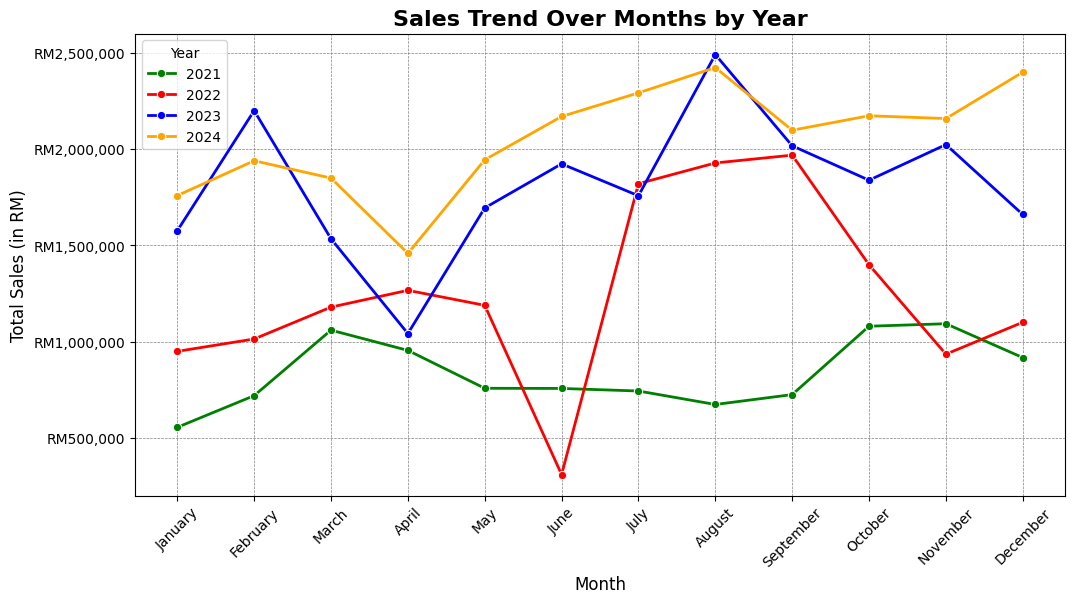

In [ ]:
#Plot the sales trend over months by year
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns  # Import seaborn for color palettes
import pandas as pd #import pandas


def rm_formatter(x, pos):
    return f"RM{int(x):,}"

#custom_palette with vibrant colors
custom_palette={
    2021: '#008000',  # Green
    2022: '#FF0000',  # Red
    2023: '#0000FF',  # Blue
    2024: '#FFA500'   # Orange
}

plt.figure(figsize=(12, 6))

#apply custom colors and remove confidence interval
#Define month_categories
month_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['month'] = pd.Categorical(df['month'], categories=month_categories, ordered=True)
sns.lineplot(data=df, x='month', y='total_sales', hue='year', marker='o', estimator='sum', linewidth=2, palette=custom_palette, errorbar=None)

#customise the plot
plt.title('Sales Trend Over Months by Year', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (in RM)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(rm_formatter))
plt.legend(title='Year')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.show()



The graph shows the sales increasing over the months across different years from 2021 to 2024. Sales in 2024 are generally higher compared to previous years showing a steady growth over the years. The lines for different years follow a similar general shape but with variation in magnitude and it shows seasonal patterns as there are months showing higher value while some dip significantly, for example in June 2022. The significant dip could be attributed to lower demand during that period. <font color='red'>**(What specific event caused the significant dip? Could you be more specific?)**</font>

The upward trend in 2024 suggests increase market demand and effective marketing strategies. The company can plan marketing strategies according to the peak months for example plan for promotions during the peak months and stabilize sales during low peak months by conducting targeted marketing campaigns. These data can be used to aid in decision-making and forecast future sales trends


2. Top 10 Products by Sales

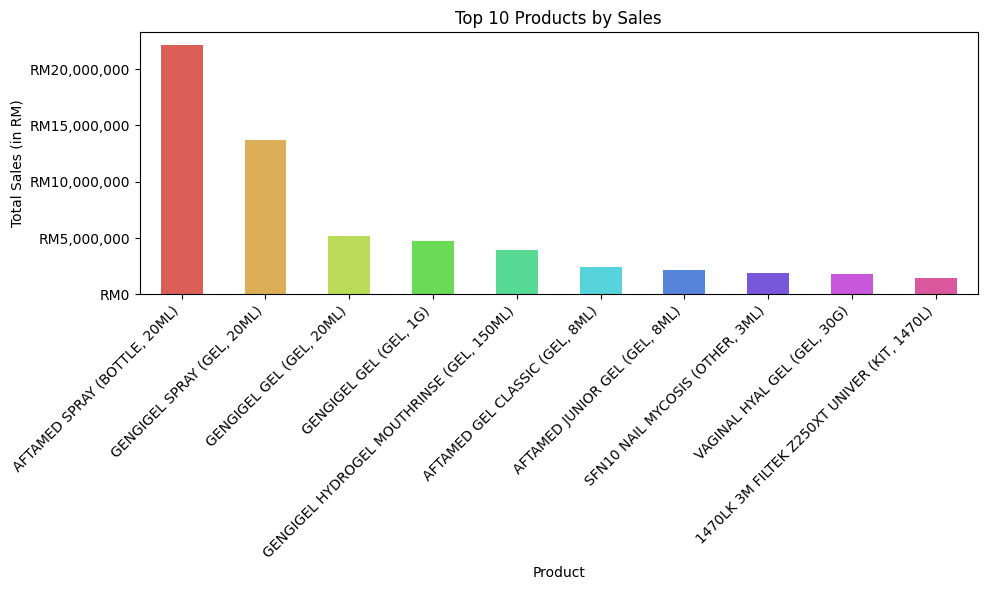

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns  # Import seaborn for color palettes


def rm_formatter(x, pos):
    return f"RM{int(x):,}"

top_products = df.groupby('description')['total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))

# Get a list of colors from a seaborn palette
colors = sns.color_palette("hls", len(top_products))

# Pass the list of colors to the 'color' argument
top_products.plot(kind='bar', color=colors)

plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales (in RM)')
plt.xticks(rotation=45, ha='right')

# Apply the rm_formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(rm_formatter))

plt.tight_layout()
plt.show()


The bar chart above shows the top 10 products by sales in Novel Department at Pharmaniaga where the products can be seen represents various kind of formulations such as spray, gel and sachets given for the same brand for example, Gengigel. The top product is Aftamed Spray bottle of 20ml as it shows a significantly large sales over RM 20 million compared to other products. Aftamed spray bottle of 20ml seems to be high priority item in terms of sales distribution and vital for the company to ensure its availabiltiy ofor the businesss. However, there is a significant drop of sales between the top product and the second top product, Gengigel spray bottle of 20ml with total sales of less than RM15 million and a more gradual decline among the rest. These suggests these products need targeted marketing or promotions to boost its sales as there are opprotunity for growth. Based on this graph, it also suggests customer preference towards formulations like spray and gel hence future investment on similar product formulation may bring profit. The company can implement cross selling strategies by bundling top product with lower-ranked products to boost sales. According to a study  [Cross-Selling]( https://www.researchgate.net/publication/242537131_Cross-Selling_Sequentially_Ordered_Products_An_Application_To_Consumer_Banking_Services)  on "Cross-Selling Sequentially Ordered Products: An Application To Consumer Banking Services", customers have predictable lifecycles which provides opportunities for businesses to cross-sell additional products and services to existing customers

3. Pareto Analysis

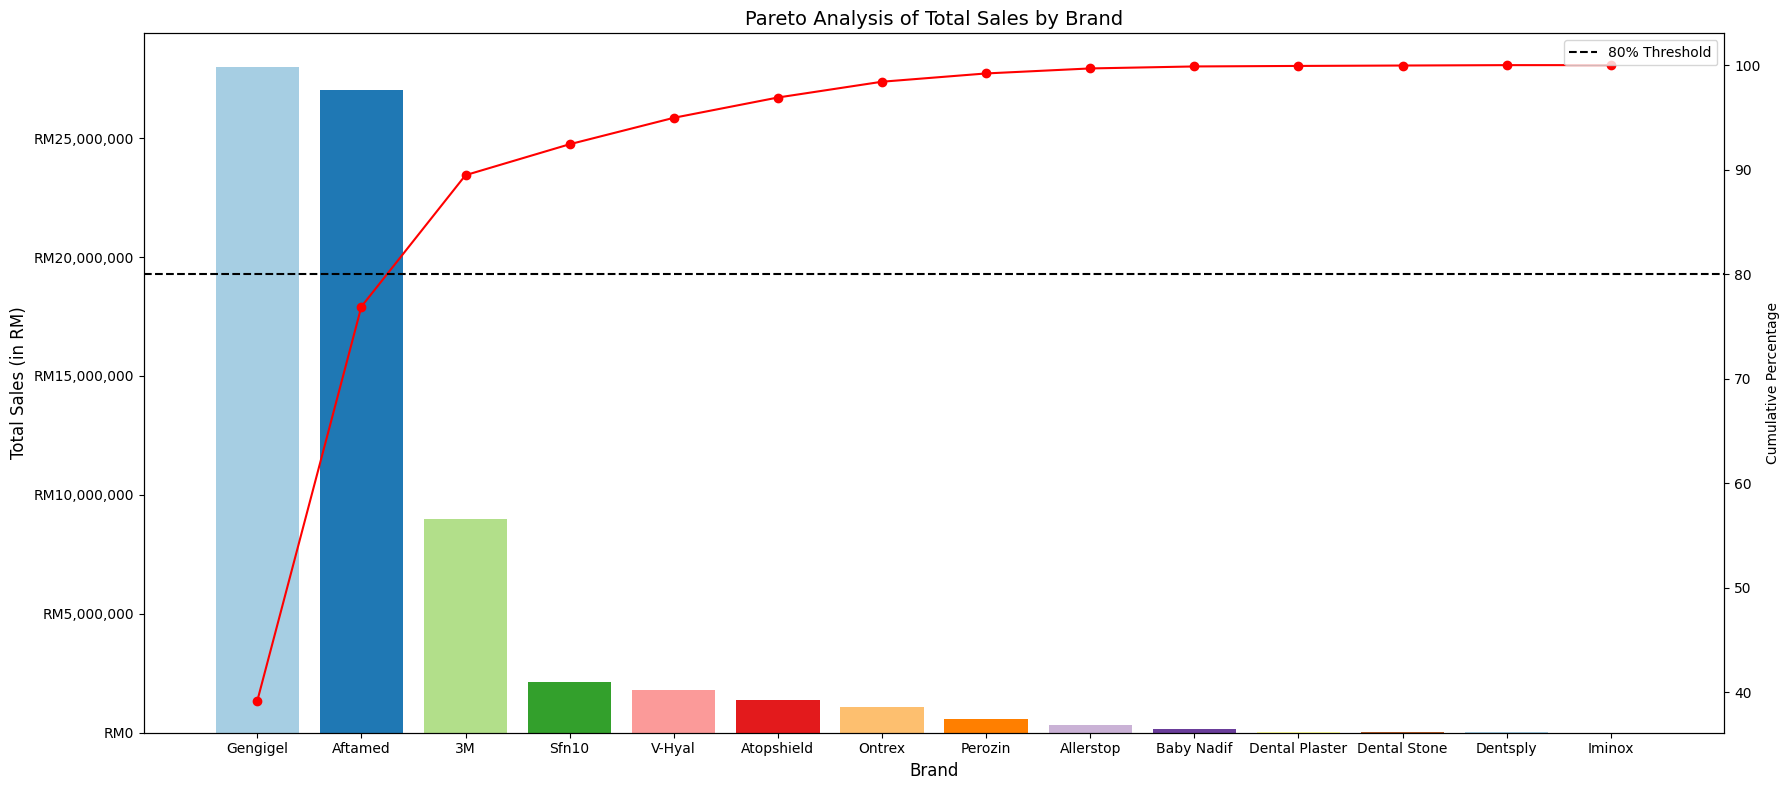

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def rm_formatter(x, pos):
    return f"RM{int(x):,}"


pareto_data = df.groupby('brand', observed=False)['total_sales'].sum().sort_values(ascending=False)
pareto_cumulative = pareto_data.cumsum() / pareto_data.sum() * 100

# Increased figure size, especially the width
plt.figure(figsize=(18, 8))
plt.bar(pareto_data.index, pareto_data.values, color=plt.cm.Paired.colors)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total Sales (in RM)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(rm_formatter))
plt.title('Pareto Analysis of Total Sales by Brand', fontsize=14)
plt.twinx()
plt.plot(pareto_cumulative, marker='o', linestyle='-', color='red')
plt.axhline(80, color='black', linestyle='--', label="80% Threshold")
plt.ylabel('Cumulative Percentage')
plt.legend(loc='upper right')
# Get unique brand names from pareto_data index
brands = pareto_data.index
# Use brands for x-axis ticks and labels, set rotation to vertical and reduced fontsize
plt.xticks(range(len(brands)), labels=brands, rotation='vertical', ha='right', fontsize=8)
# Adjust subplot parameters to add more space for x-axis labels
plt.subplots_adjust(bottom=0.35)  # Increased bottom margin for more space

plt.tight_layout()
plt.show()


The Pareto Chart above, also known as the 80/20 rule chart helps to identify the key brand products that contirbute to the overall sales. The left y-axis represent the total sales of each brand in RM and arranged in descending order whereas the righ y-axis shows the cumulative precentage of total sales. The black dashed line on the chart represents the 80% threshold of cumulative sales. The intersection point between the dashed line and the red curve indicates which brand contibuting to 80% of total sales.

Based on the chart, Gengigel and Aftamed are the brand products that contribute to 80% of total sales whereas the other brands represented by smaller bars to the right contibute minimally. The business should focus on the key brand contibutors in terms of inventory management and promotional events. Performance of the low performing brands should be further evaluated before further actions taken, for example exploration of different strategies to improve the sales or for discontinuation of product if necessary

4. Percentage Growth of Sales Year over Year

As mentioned previously in the handling outliers part,  the data has outliers which is handled differently in this analysis. Outliers can distort percentage of growth analysis by causing extreme spikes hence the outliers are capped using the IQR method to smooth the trend. The analysis is performed with and without capping for comparison

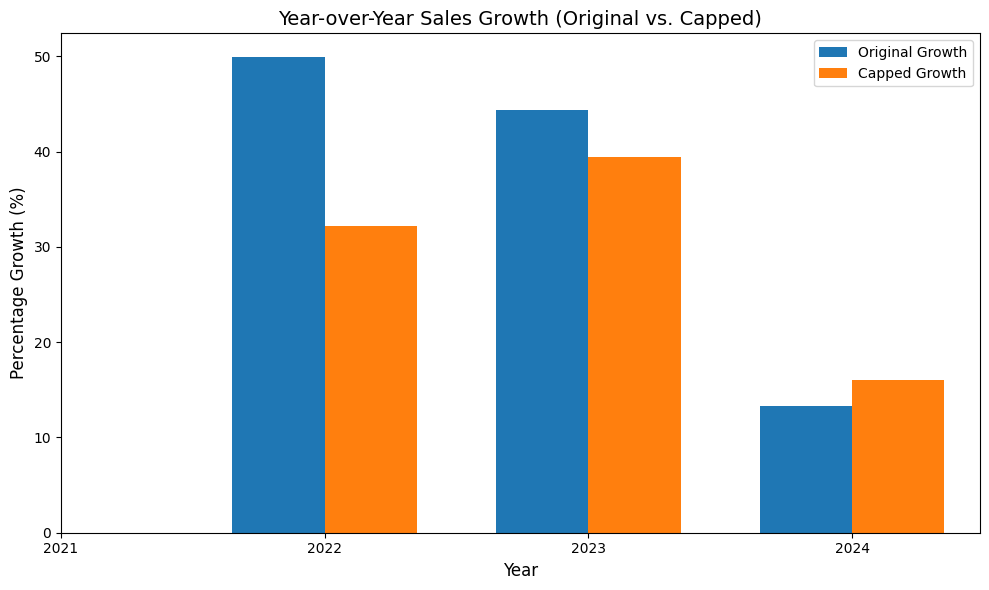

In [ ]:
Q1 = df[['total_sales', 'quantity']].quantile(0.25)
Q3 = df[['total_sales', 'quantity']].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5 * IQR

# Capping values for smoother trends (e.g., 95th percentile)
upper_cap = df['total_sales'].quantile(0.95)
df['Capped Sales'] = df['total_sales'].clip(upper=upper_cap)

# Calculate Year-over-Year percentage growth
# Creating a DataFrame with the necessary columns
yearly_growth = df.groupby('year').agg(
    Total_Sales=('total_sales', 'sum'),  # Aggregating 'total_sales'
    Capped_Sales=('Capped Sales', 'sum') # Aggregating 'Capped Sales'
).reset_index()

# Calculate percentage change
yearly_growth['Pct_Change_Original'] = yearly_growth['Total_Sales'].pct_change() * 100
yearly_growth['Pct_Change_Capped'] = yearly_growth['Capped_Sales'].pct_change() * 100


# Bar plot for Year-over-Year Sales Growth
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(yearly_growth['year']))

# Original growth
plt.bar(x, yearly_growth['Pct_Change_Original'], bar_width, label='Original Growth')

# Capped growth
plt.bar([i + bar_width for i in x], yearly_growth['Pct_Change_Capped'], bar_width, label='Capped Growth')

plt.title('Year-over-Year Sales Growth (Original vs. Capped)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Growth (%)', fontsize=12)
plt.xticks([i + bar_width / 2 for i in x], yearly_growth['year'])
plt.legend()
plt.tight_layout()
plt.show()



The chart above displays the sales growth rate for year 2022, 2023 and 2024 where original growth represents sales growth based on the original data with outliers wheres capped growth in orange represents sales growth after capping outliers. Capped growth is included to represent a fair representation of growth trend without the presence of outliers that may skew the results and more reliable for forecasting. The original growth provides full transparency showing the impact of extreme outliers to the overall sales growth performance.

In 2022, the original growth shows a significantly higher growth rate than capped growth of 49% and 32% respectively. This suggests the presence of outliers inflated the original gowth rate. Sales growth in  2023 reduced to 42% but increased for capped growth to 39%. However, the gap between the original and capped growth is narrower. A more significant reduction in growth rate is observed in 2024 to 13% for original growth and 16% for capped growth. Capped growth provides a more reliable measure of sales performance as it removes distortians caused by extreme outliers thus reflects a more accurate trend. The reduction in gap between original and capped growth suggests more consistent sales patterns over the years. Overall,the growth rate is positive but at a slower rate. The Covid-19 pandemic could have influenced the growth rate along with other factors such as logistic issues, lower marketing investments and business focus on sustaining existing customers. The research paper on["COVID-19 affect logistics and supply chain processes"](https://pmc.ncbi.nlm.nih.gov/articles/PMC10199754/) provides empirical evidence on the impact of the Covid-19 pandemic on logistics and supply chain processes which affects various sector of business even after the end of pandemic.

<font color='red'>**Comments:**

<font color='red'>**- Would you like to comment on why the overall percentage growth for 2024 is lower compared to 2022 and 2023?**

<font color='red'>**- Could this be due to changes in government policies that affected the growth?**


4. Sales Distribution by Customer Group

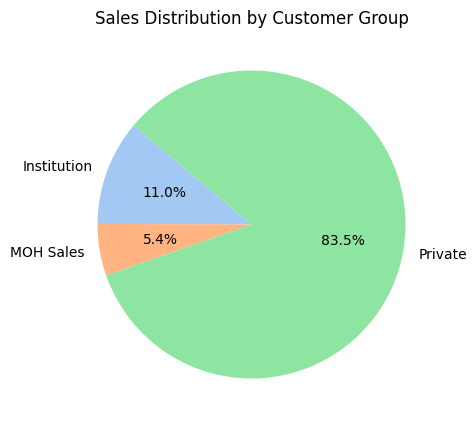

In [ ]:
customer_group_sales = df.groupby('cust_group', observed=False)['total_sales'].sum()

plt.figure(figsize=(8, 5))
customer_group_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Sales Distribution by Customer Group')
plt.ylabel('')
plt.show()



The pie chart on "Sales Distribution by Customer Groups" shows that the majority of sales of 83.5% comes from private customers.Hence, the private group of customers are the primary source of revenue for the business in Novel Department. Implementation of customer loyalty programs would foster long-term relationships. The next portion of sales of 11.0% comes from Institution. There could be opportunities for sales growth by focusing on partnerships with institutions. Ministry of Health(MOH) contibutes to a small fraction of 5.4% of the total sales. This could be due to a niche market or limited contracts.

Although private customer groups are a major revenue source, over-reliance on a single customer segment can be risky. The company should diversify into new markets or customer segments and invest in developing new products tailored to the needs of institutions and potentially the MOH.

5. Heatmap of Sales Distribution Across Region

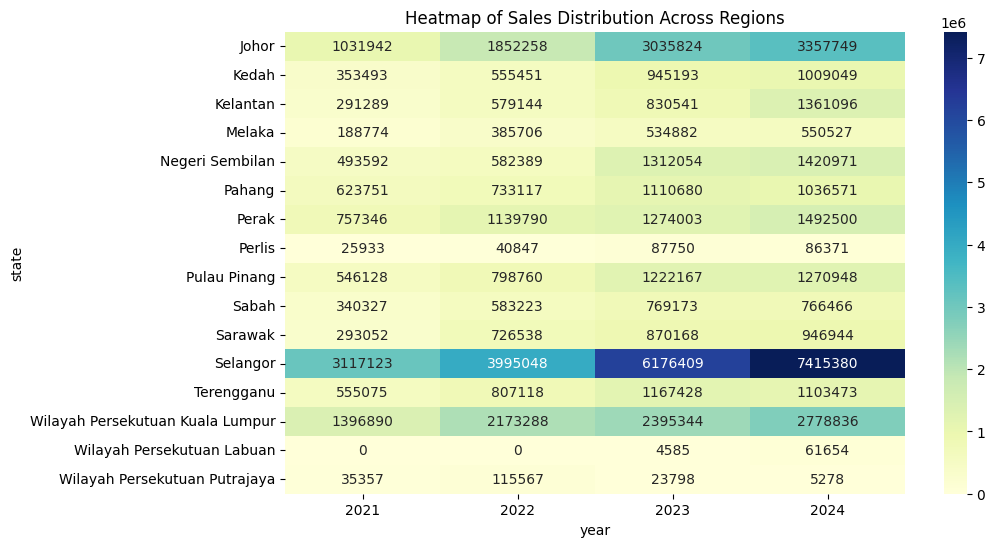

In [ ]:
region_sales = df.pivot_table(values='total_sales', index='state', columns='year', aggfunc='sum', fill_value=0, observed=False)

plt.figure(figsize=(10, 6))
sns.heatmap(region_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Sales Distribution Across Regions')
plt.show()



The heatmap above shows the sales distribution across various regions from 2021 till 2024. The darker shade and high sales value in the heatmap shows Selangor is the key sales region consistently. States like Johor, Perak, Penang and Wilayah Persekutuan Kuala Lumpur shows increasing growth over the years. Smaller regions like Perlis shows a relatively slow and stable growth. The drop in sales in Wilayah Persekutuan Putrajaya can be investigated as the drop could be due to reasons like demographic changes or reduced business activity.

6. Stacked Comparison of Cost vs Revenue Across Categories

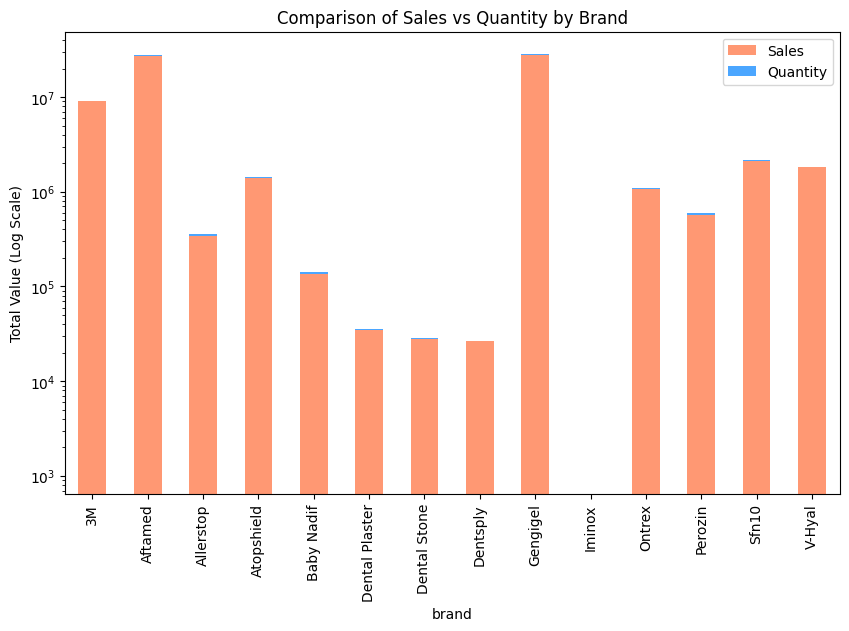

In [ ]:

category_data = df.groupby('brand', observed=False)[['total_sales', 'quantity']].sum()

category_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['coral', 'dodgerblue'], alpha=0.8)
plt.title('Comparison of Sales vs Quantity by Brand')
plt.ylabel('Total Value (Log Scale)')
plt.legend(['Sales', 'Quantity'])
plt.yscale('log')
plt.show()



The graph highlights the relationship between quantity sold and revenue generated across different brands. Gengigel is the high revenue driver for the business and provides opportunities for futher expansion in market. Next is Aftamed that also shows a storng market presence. Other brands like V-Hyal, Sfn10, and Atopshield shows potential for growth. Based on the insights obtained, there are several points for consideration such as awareness for brands that are low-performing, saturation of market which can limit the growth of some products and also the revision of product pricing using value-based approach. Understanding of customer needs are also crucial as mentioned in an article "Value-based pricing involves setting prices based on a consumer's perceived value of a product or service", which highlights in order for companies to develop a successful value-based pricing strategy, they must invest a significant amount of time with their customers to determine their wants [Biomenthal,2024](https://www.investopedia.com/terms/v/valuebasedpricing.asp).

<font color='red'>**Comments:**

<font color='red'>**- Would it be better to use a grouped bar plot instead of a stacked bar plot in this case?**

<font color='red'>**- It seems that the representation of the bars for Quantity is being masked by the Sales bars.**


# **CONCLUSION**

In conclusion, the analysis conducted shows there are seasonal trends implicating promotional planning to maximise sales during the peak season. The pareto analysis highlights a small group of products such as Gengigel and Aftamed contribute to majority of sales implicating the importance to expand the top performing product lines to drive business growth. Private customers are the major contributors to sales whereas other customer groups has potential to grow. The company should strengthen their relationship with private sector customer while develop strategies to boost sales among other customer groups. Market research required to identify barriers in underperforming regions while replicationg strategies from region like Selangor. Pricing in low margin products should be also be addressed and reevaluated for profitability.